<a href="https://colab.research.google.com/github/schaidez2727/MAT-421/blob/main/Final_Paper_Chaidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><center>Motor Vehicle Collisions in the U.S.: Analysis of Trends and Contributing Factors Using Computational Methods</center></h1>

<h4><center>Santana Chaidez

MAT 421

Prof. Haiyan Wang</center></h4>

____
## 1. Introduction ##
___

**Research Objective**

The primary research objective of this study is to create a mathematical model to study the relationships between vehicle collisions and their different causes and factors. The exploration of different sets of collision data in the United States will be conducted. A key factor of interest will be different characteristics of the at-fault party, including but not limited to: sobriety, inattention, and phone use. The time of day will also be noted in these observations in order to explore relationships between collision frequency and road conditions.

Analyzing the data on vehicle collisions and their multiple contributing factors is important for promoting driver safety (via campaigns, education, license requirements, etc.) and establishing legal rules and guidelines for civilian drivers. It is also an important consideration in urban planning and contributes to the development and maintenance of roadways. Finally, observing the change in collision frequency and at-fault party characteristics allows for the identification of developing or worsening collision factors and how to address them.

____
## 2. Math Methodolgy ##
___

My primary goal for this project is to develop a predictive model for motor vehicle collisions that involve various contributing factors, based on time of day. This will not only allow individuals to be more conscious of the potential causes of traffic collision and encourage them to work to mitigate these potential factors, but will also promote extra vigilance on the road during times when collisions are most frequent - especially with the added context of what contributing factors tend to be most prevalent at the relevant time of day. The first variation will model collision occurrences overall. A second variation will model collision occurrences with inattention/distraction as the primary contributing factor.

First, I will use the **cubic spline interpolation** method in order to fit the points contained in the dataset into a function. This method estimates a function for a dataset by defining a set of piecewise defined functions between each of the discrete data points, joining them with cubic polynomials. Each cubic polynomial joins neighbouring points $(x_{i}, y_{i})$ and $(x_{i+1}, y_{i+1})$ with the form:

$S_{i}(x)=a_{i}x^{3}+b_{i}x^{2}+c_{i}x+d_{i}$

What’s more is that each cubic spline joins smoothly with its neighbours, so each of the cubic splines have continuous first and second derivatives (Kong et al., 2020).

I will continue by making a predicive model for collisions by time of day with the tools in Python. The effectiveness of this predictive model will be tested by computing the $R^{2}$ score of the model, which describes how well the variation of the dependent variable is explained by the independent variable. This is done by dividing the explained variation by the total variation, ranging from 0 to 1.

____
## 3. Python Tools ##
___

### **Python Libraries** ###

To analyze these chosen dataset, I will be uploading them into Python and using various Python libraries in order to explore and perform computation on the data. The Python libraries will include:

* NumPy - This library facilitates array computations and representations. It also provides various mathematical functions, numerical tools, linear algebra operations, Fourier transforms, and analytic functions.
* SciPy - This library facilitates scientific and numerical computations. It provides built-in numerical methods for integration and solving ODEs, along with other optimization, interpolation, and analysis tools.
* Pandas - This library provides essential data manipulation and analysis tools, with efficient data storage and manipulation tools/structures.
* Plotly Express and MatPlotLib - These libraries facilitate the creation of visualizations and plots.
* SKLearn - sklearn, or Scikit-learn, if a library that facilitates machine learning in Python, allowing for the analysis of data and the creation of models.

To analyze the dataset, they will be uploaded as dataframes and previewed within the project notebook using the Pandas library. The Plotly Express and MatPlotLib libraries will be used to visually plot and explore the data. For instance, the amount of vehicle collisions will be plotted against different causation factors, as well as perhaps time of day and at-fault party characteristics. The NumPy and SciPy libraries will be used to carry out the necessary computations in order to create a mathematical model for these relationships, and also to find the roots of these relationships and observe how the system model changes over time. Finally, a predictive model will be make using SKLearn to compare to the data.

____
## 4. The Data ##
___

### **About the Data** ###

I chose this particular New York City traffic collision dataset due to the large population of New York City, as well as the availability of current data due to recent and frequent updates. According to the results of the 2020 census data provided by Ballotpedia’s website, New York City, NY is the highest populated city in the United States of America, with a population of 8,804,190. This is over twice the amount of the second-most populous city - Los Angeles, CA - which has a population of 3,898,747 (Ballotpedia, n.d.). Thus, I believe that the data from such a populous city will be the most effective and complete in presenting the trends across the various contributing factors involved in vehicle collisions. Additionally, the database was updated as recently as April of 2025, making the data current and more reflective of present collision trends in the US.


The city of New York’s OpenData web page explains that this dataset, titled ‘Motor Vehicle Collisions - Crashes’ on the page, details various information involving all crash events that have occurred in the city and were reported to the police. As such, all data is provided by the New York Police Department. Each row of the table contains information on an individual collision event, sourced from police reports from the collision (City of New York, 2025). The data includes columns with information on the time and date for the collision, location, the number of individuals who were injured or killed as a result of the collision, contributing factors for all vehicles involved, and the type of all vehicles involved (such as truck, bike, sedan, etc.). The only potential obstacle presented for my analysis in particular is the specificity of the contributing factors listed in the table. However, we will address this and clean the data a bit in the following section.


### **Data Exploration** ###

I will begin by getting a better understanding of the dataset by uploading it into a dataframe using the Pandas library and exploring the data. This dataframe will be assigned to the variable 'df'.

In [378]:
# Import Pandas Library as pd
import pandas as pd

# Import dataset as a dataframe
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To begin my exploratory analysis of the data, I will simply preview the data that I have imported. This process will allow me to familiarize myself with the column names, data types, and the information included in the data. The .shape method will be used to retrieve the number of rows and columns in the dataframe, the .sample() method will allow us to preview a sample of random rows from the dataframe, and the .info() method will return the data types for each of the columns.

In [379]:
# Previewing the data
print(df.shape) # number of rows and columns in dataset
display(df.sample(5)) # sample of data
df.info() # column names + data types

(539259, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
368437,07/17/2021,15:30,NaN,NaN,40.609150,-74.149870,"(40.60915, -74.14987)",STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4438854,Sedan,Sedan,NaN,NaN,NaN
79451,05/25/2024,17:43,QUEENS,11385.0,40.705000,-73.911410,"(40.705, -73.91141)",SENECA AVENUE,BLEECKER STREET,NaN,...,Unspecified,NaN,NaN,NaN,4727643,Station Wagon/Sport Utility Vehicle,Motorcycle,NaN,NaN,NaN
75135,06/10/2024,19:05,NaN,NaN,40.524740,-74.233444,"(40.52474, -74.233444)",BOSCOMBE AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4731709,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
491957,05/22/2020,10:25,BROOKLYN,11221.0,40.687935,-73.915400,"(40.687935, -73.9154)",HANCOCK STREET,BUSHWICK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4315884,Tanker,Sedan,NaN,NaN,NaN
342349,10/05/2021,23:10,NaN,NaN,40.640034,-73.877945,"(40.640034, -73.877945)",BELT PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4465663,Sedan,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539259 entries, 0 to 539258
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     539259 non-null  object 
 1   CRASH TIME                     539259 non-null  object 
 2   BOROUGH                        364571 non-null  object 
 3   ZIP CODE                       364505 non-null  float64
 4   LATITUDE                       497908 non-null  float64
 5   LONGITUDE                      497908 non-null  float64
 6   LOCATION                       497908 non-null  object 
 7   ON STREET NAME                 391805 non-null  object 
 8   CROSS STREET NAME              261264 non-null  object 
 9   OFF STREET NAME                147449 non-null  object 
 10  NUMBER OF PERSONS INJURED      539258 non-null  float64
 11  NUMBER OF PERSONS KILLED       539259 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

This is a *lot* of data (539,259 rows), so I will limit my analysis to the most recent data. That is, I will filter to only the data on collisions from the past year.

In [380]:
# Convert the 'CRASH DATE' column to datetime objects
df['date'] = pd.to_datetime(df['CRASH DATE'], dayfirst=False, yearfirst=False)

df = df[df['date'] >= '01/01/2024']
print(df.shape)
df.head()

(115294, 30)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date
0,04/22/2025,21:00,NaN,NaN,40.616364,-74.15675,"(40.616364, -74.15675)",RICHMOND AVE,GOETHALS RD N,NaN,...,NaN,NaN,NaN,4807618,Sedan,NaN,NaN,NaN,NaN,2025-04-22
1,04/22/2025,9:00,QUEENS,11373.0,40.745610,-73.88747,"(40.74561, -73.88747)",41 AVE,78 ST,NaN,...,NaN,NaN,NaN,4807766,Sedan,NaN,NaN,NaN,NaN,2025-04-22
2,04/22/2025,21:39,NaN,NaN,40.762940,-73.86067,"(40.76294, -73.86067)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,4807533,Sedan,NaN,NaN,NaN,NaN,2025-04-22
3,04/22/2025,4:50,MANHATTAN,10036.0,40.759106,-73.99214,"(40.759106, -73.99214)",W 43 ST,9 AVE,NaN,...,NaN,NaN,NaN,4807588,Taxi,NaN,NaN,NaN,NaN,2025-04-22
4,04/22/2025,9:14,BRONX,10456.0,40.829140,-73.91139,"(40.82914, -73.91139)",E 166 ST,WEBSTER AVE,NaN,...,NaN,NaN,NaN,4807653,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2025-04-22


It is also helpful to observe the different contributing factors included in this dataset. The contributing factors can be identified using the .unique() method, which lists all the unique values present in a column.

In [381]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Unspecified', 'Driver Inattention/Distraction',
       'Unsafe Lane Changing', 'Traffic Control Disregarded',
       'Passing or Lane Usage Improper', 'Failure to Yield Right-of-Way',
       'Fell Asleep', 'Brakes Defective', 'Backing Unsafely',
       'Following Too Closely', 'Unsafe Speed', 'Passing Too Closely',
       'Reaction to Uninvolved Vehicle', 'Turning Improperly',
       'Alcohol Involvement', 'Other Vehicular',
       'View Obstructed/Limited', 'Passenger Distraction',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fatigued/Drowsy', 'Aggressive Driving/Road Rage', 'Illnes',
       'Driver Inexperience', 'Failure to Keep Right',
       'Lost Consciousness', 'Tire Failure/Inadequate',
       'Oversized Vehicle', 'Steering Failure', 'Obstruction/Debris',
       'Cell Phone (hand-Held)', nan, 'Glare',
       'Using On Board Navigation Device', 'Outside Car Distraction',
       'Accelerator Defective', 'Drugs (illegal)', 'Pavement Defective',
 

From this output, it is clear that there are a lot of contributing factors identified in this dataset. For a more efficient analysis, I will group these various factors into broader groups. These groups will include: traffic violations, phone/device usage, visibility issues, fatigue, inattention/distraction, medical issues, vehicle malfunction, environment, and substance use. To clarify, 'environment' will include any contributing factors related to road or traffic control issues/defects, as well as any external factors in the environment that contributed to the collision (such as 'Animal Action' or 'Reaction to Uninvolved Vehicle', for instance). Additionally, 'substance use' combines alcohol, drug, and prescription medication involvement.

These broader contributing factors will be applied to the dataframe as a column titled 'factor'. This column will be created by creating a dictionary that maps the factors included in the original data to my broader factor groups. I can then use the .map() method to apply this dictionary to the dataframe.

In [382]:
# Define the mapping from contributing factors to groups
factor_map = {
    'Unsafe Lane Changing': 'traffic violation',
    'Traffic Control Disregarded': 'traffic violation',
    'Passing or Lane Usage Improper': 'traffic violation',
    'Failure to Yield Right-of-Way': 'traffic violation',
    'Backing Unsafely': 'traffic violation',
    'Following Too Closely': 'traffic violation',
    'Unsafe Speed': 'traffic violation',
    'Oversized Vehicle': 'traffic violation',
    'Passing Too Closely': 'traffic violation',
    'Turning Improperly': 'traffic violation',
    'Aggressive Driving/Road Rage': 'traffic violation',
    'Failure to Keep Right': 'traffic violation',

    'Cell Phone (hand-Held)': 'phone/device usage',
    'Using On Board Navigation Device': 'phone/device usage',
    'Other Electronic Device': 'phone/device usage',
    'Texting': 'phone/device usage',
    'Cell Phone (hands-free)': 'phone/device usage',

    'Fell Asleep': 'fatigue',
    'Fatigued/Drowsy': 'fatigue',

    'Driver Inattention/Distraction': 'inattention/distraction',
    'Eating or Drinking': 'inattention/distraction',
    'Passenger Distraction': 'inattention/distraction',
    'Outside Car Distraction': 'inattention/distraction',
    'Listening/Using Headphones': 'inattention/distraction',

    'Illnes': 'medical issue',
    'Lost Consciousness': 'medical issue',
    'Physical Disability': 'medical issue',

    'Brakes Defective': 'vehicle malfunction',
    'Tire Failure/Inadequate': 'vehicle malfunction',
    'Tinted Windows': 'vehicle malfunction',
    'Steering Failure': 'vehicle malfunction',
    'Accelerator Defective': 'vehicle malfunction',
    'Windshield Inadequate': 'vehicle malfunction',
    'Tow Hitch Defective': 'vehicle malfunction',
    'Headlights Defective': 'vehicle malfunction',

    'Reaction to Uninvolved Vehicle': 'environment',
    'Obstruction/Debris': 'environment',
    'Glare': 'environment',
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'environment',
    'Pavement Defective': 'environment',
    'Pavement Slippery': 'environment',
    'Animals Action': 'environment',
    'Traffic Control Device Improper/Non-Working': 'environment',
    'View Obstructed/Limited': 'environment',
    'Lane Marking Improper/Inadequate': 'environment',
    'Driverless/Runaway Vehicle': 'environment',
    'Shoulders Defective/Improper': 'environment',
    'Other Lighting Defects': 'environment',

    'Alcohol Involvement': 'substance use',
    'Drugs (illegal)': 'substance use',
    'Prescription Medication': 'substance use'
}

# Map the 'CONTRIBUTING FACTOR VEHICLE 1' column to the new 'factor' column
df['factor'] = df['CONTRIBUTING FACTOR VEHICLE 1'].map(factor_map).fillna('other/unspecified')

# Preview the data
df.head()

<ipython-input-382-a487b231da0c>:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,date,factor
0,04/22/2025,21:00,NaN,NaN,40.616364,-74.15675,"(40.616364, -74.15675)",RICHMOND AVE,GOETHALS RD N,NaN,...,NaN,NaN,4807618,Sedan,NaN,NaN,NaN,NaN,2025-04-22,other/unspecified
1,04/22/2025,9:00,QUEENS,11373.0,40.745610,-73.88747,"(40.74561, -73.88747)",41 AVE,78 ST,NaN,...,NaN,NaN,4807766,Sedan,NaN,NaN,NaN,NaN,2025-04-22,inattention/distraction
2,04/22/2025,21:39,NaN,NaN,40.762940,-73.86067,"(40.76294, -73.86067)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4807533,Sedan,NaN,NaN,NaN,NaN,2025-04-22,traffic violation
3,04/22/2025,4:50,MANHATTAN,10036.0,40.759106,-73.99214,"(40.759106, -73.99214)",W 43 ST,9 AVE,NaN,...,NaN,NaN,4807588,Taxi,NaN,NaN,NaN,NaN,2025-04-22,traffic violation
4,04/22/2025,9:14,BRONX,10456.0,40.829140,-73.91139,"(40.82914, -73.91139)",E 166 ST,WEBSTER AVE,NaN,...,NaN,NaN,4807653,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2025-04-22,other/unspecified


To continue this analysis, I will visualize the data in order to gain insight on general trends between different variables. For the purposes of this project's objectives, I will be focusing on the crash date, crash time, and contributing factors for each collision. These variables are represented by the columns 'CRASH DATE', 'CRASH TIME', and 'factors' - the column of collision factor groups that I adapted from the 'CONTRIBUTING FACTOR VEHICLE 1' column. I will only be observing the contributing factors for Vehicle 1 because this is the primary at-fault vehicle. To create these visualizations, I will import the Plotly Express library.

In [383]:
# Import Plotly Express
import plotly.express as px

First, I will analyze the trends in vehicle collisions from the dataset by time of day. The data entries can be sorted by time of day using the .sort_values() method, which sorts that rows/entries in a dataframe by a specified column.

In [384]:
# Convert 'CRASH TIME' column from string type to time object
df['time'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time

# Sort collisions by time of day
df_sorted = df.sort_values(by='time')

# Plot crash time as a histogram to observe frequency of crashes at different times
px.histogram(df_sorted, x='time', color='factor', title='Collisions by Time of Day')

In [385]:
df['factor'].value_counts()

,count
factor,
traffic violation,40710
other/unspecified,35722
inattention/distraction,28688
environment,5652
substance use,2349
vehicle malfunction,979
fatigue,611
medical issue,491
phone/device usage,92


The results of plotting this collision data by time of data and sorting by collision factor yields a very interesting result. To start, if we de-select all collisions with the contributing factor of 'other/unspecified', we can see that by far the most frequent contributing factor is some form of traffic violation on the part of the at-fault party. This is to be expected. However, if we also de-select collisions with 'traffic violation'as a factor, we can see that the next most common factor after 'traffic violations' is 'inattention/distraction' across the board. The visual assessment is also confirmed by the count of occurrences for each of the unique items in the 'factor' column using the .value_counts() method, which counts the amount that each unique item or 'value' in the specified column occurs. This is interesting because these are inattention/distraction situations that are not directly related to device usage. I would have anticipated a higher frequency of things like cell phone usage as a contributing factor in collisions, but this does not seem to be the case - this factor is actually the most infrequent among all the collisions in the dataset!

This could be indicative of the success of awareness campaigns against using phones and devices while driving. If this is the case, then there is a potential solution in shifting the focus of road safety awareness campaigns to topics such as traffic violations and inattention, which are far more frequent contributing factors than phone usage based on the data. The intensity/urgency of campaigns against driving under the influence may need to be increased as well.

Additionally, the frequency of environmental contributing factors in collisions could mean the need for the city to increase maintenance efforts for road conditions and traffic controls. For all these possibilities, further information and research will be presented below.

This figure also confirms that the frequency of motor vehicle collisions peak during what are considered to be "rush hour" traffic times, such as around 8 AM and 3-4 PM, when most people are commuting to and from work or school. There is another peak during the evening at around 7 PM, likely due to participation in night life and leisure activities. This is a good confirmation of assumed trends, and will help to confirm the validity of the predictive models produced for collisions moving forward.

____
## 5. Implementation of Math Methods ##
___

### **Computational Experimentation** ###

### Cubic Spline Interpolation ###

To start, I will import the relevant Python libraries in order to compute and plot the resulting models - NumPy and MatPlotLib. See the preceding Python Tools section for more information.

In [386]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To perform a cubic spline interpolation on the data, I must first have to get the relevant information from the data. So for all collisions, the number of total collisions at each time, as well as the corresponding times, are needed. The .groupby() method will be used to group the information in the dataframe by the unique values in a specified column. Then the .count() method will be used to count the amount of values in each of these groups.

In [387]:
from datetime import date
# Create an array that contains each time present in the dataset
time_unique = df_sorted['time'].unique()
print(len(time_collision)) # confirming that the dataset contains each minute of the day (1440 minutes in  day)
time_collisions_by_minute = list(range(1, 1440)) # represent each minute with a number 1 - 1439

# Count the amount of collisions at each time present in the data set
collisions_by_time = df_sorted.groupby('time').count()
collisions = collisions_by_time['CRASH TIME']
total_collisions = collisions.sum()
collisions_pct = 100 * collisions / total_collisions
display(collisions)
display(collisions_pct)

1440


,CRASH TIME
time,
00:00:00,2068
00:01:00,79
00:02:00,41
00:03:00,33
00:04:00,36
...,...
23:55:00,104
23:56:00,34
23:57:00,30


,CRASH TIME
time,
00:00:00,1.793675
00:01:00,0.068520
00:02:00,0.035561
00:03:00,0.028622
00:04:00,0.031225
...,...
23:55:00,0.090204
23:56:00,0.029490
23:57:00,0.026020


It seems that the time 00:00 (midnight) is most likely used when a time was not specified in the reporting of the collision, due to the unusually high number of collisions that correspond with this time. Because of this, the time 00:00 will be excluded from my models.

Now the previously defined functions can be applied to these arrays in order to compute points based on the Newton polynomial for the data.

In [388]:
# Remove data at time 00:00 from time array
collisions_pct_cleaned = np.array(collisions_pct)[1:]
print(len(collisions_pct_cleaned))
collisions_pct_cleaned

1439


array([0.06852048, 0.03556126, 0.02862248, ..., 0.02602043, 0.02341839,
       0.02515309])

Now I will perform a cubic spline interpolation on the data to plot the frequency of collisions (by percent of all occurrences in the data) for specific times within the day. This may help get a more accurate prediction is a smaller time frame is of interest.

I will be doing this by using the CubicSpline function from the SciPy library.

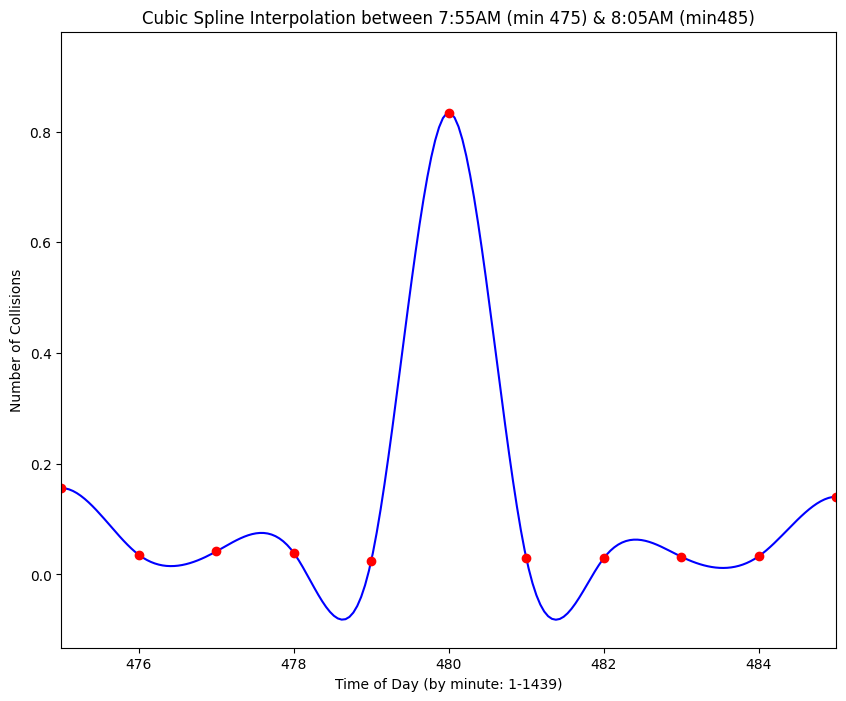

In [389]:
from scipy.interpolate import CubicSpline

# Establish the arrays for our independent and dependent variables
x = np.array(time_collisions_by_minute) # time of collision
y = collisions_pct_cleaned # number of collisions

# Use bc_type = 'natural' to add constraints
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(475, 485, 200) # choosing to look at around minute 480, or 8AM
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation between 7:55AM (min 475) & 8:05AM (min485)')
plt.ylabel('Number of Collisions')
plt.xlabel('Time of Day (by minute: 1-1439)')
plt.xlim(475,485)
plt.show()

As we can see, this plot very effectively shows the spike in collision frequency around 8 AM as a result of morning rush hour traffic!


In [390]:
# Count the amount of innattention/distraction collisions at each time present in the data set
collisions_by_time_innattention = df_sorted[df_sorted['factor'] == 'inattention/distraction'].groupby('time').count()
collisions_innattention = collisions_by_time_innattention['CRASH TIME']
display(collisions_innattention)

# Remove data at time 00:00 from time array
collisions_innattention_cleaned = np.array(collisions_innattention)[1:]
collisions_inattention_pct = 100 * collisions_innattention_cleaned / total_collisions
print(len(collisions_innattention_cleaned))
display(collisions_innattention_cleaned)
display(collisions_inattention_pct)

#Set time array
time_inattention = list(range(1, len(collisions_inattention_pct)+1))

,CRASH TIME
time,
00:00:00,504
00:01:00,17
00:02:00,9
00:03:00,5
00:04:00,10
...,...
23:55:00,26
23:56:00,9
23:57:00,10


1434


array([17,  9,  5, ..., 10,  4,  7])

array([0.01474491, 0.00780613, 0.00433674, ..., 0.00867348, 0.00346939,
       0.00607143])

As we can see, the length of the array containing collisions caused by inattention is not quite 1440. This means some minutes in the day do not have any corresponding inattention collisions in the data. However, for the sake of simplicity, and because this is an approximation, we will still label the minutes in sequential order.

Now I will continue by plotting the cubic spline interpolation for collision frequency with inattention as the primary contributing factor.

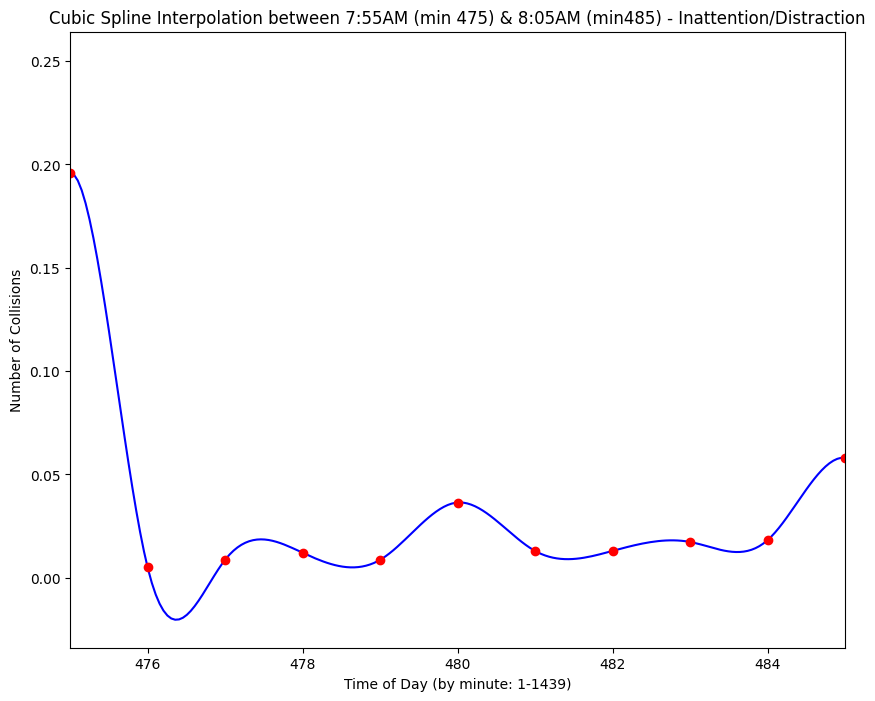

In [391]:
# Establish the arrays for our independent and dependent variables
x = np.array(time_inattention) # time of collision
y = collisions_inattention_pct # number of collisions

# Use bc_type = 'natural' to add constraints
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(475, 485, 200) # choosing to look at around minute 480, or 8AM
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation between 7:55AM (min 475) & 8:05AM (min485) - Inattention/Distraction')
plt.ylabel('Number of Collisions')
plt.xlabel('Time of Day (by minute: 1-1439)')
plt.xlim(475,485)
plt.show()

Interestingly, collisions caused by inattention seem to be comparitively less frequent during morning rush hour traffic!

### Predictive Model for Collisions by Time of Day###



In [392]:
# Import required machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Input the data from our dataset
df['hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour
df_sorted_hr = df.sort_values(by='hour')
hours = df_sorted_hr['hour'].unique()  # 24 hours
collisions_by_hr = df_sorted_hr.groupby('hour').count()
hourly_collisions = collisions_by_hr['CRASH TIME'].dropna()

# Put into new dataframe
df_new = pd.DataFrame({'hour': hours, 'collisions': hourly_collisions})

# Define variables to be used in model
X = df_new[['hour']].values
y = df_new['collisions'].values

Now that the training model has been initiatied, I will endure that the shape of the x and y arrays are appropriate for the model.

In [393]:
print(X.shape)
print(y.shape)

(24, 1)
(24,)


As we can see, y needs to be reshaped so that it matches X. We can do this using the .reshape() method, which allows us to specify the dimensions.

In [394]:
# Reshape y
Y = df_new['collisions'].values.reshape(-1, 1)

# Check shape
print(X.shape)
print(Y.shape)

(24, 1)
(24, 1)


Not that the shapes/dimensions match, the train test split can be executed. This process splits the data provided into a train set and a test set, so the model can relate the two to build its predictions.

In [395]:
# Add polynomial features to capture nonlinear behavior of trends
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.35, random_state=42)

# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 5)
(15, 1)
(9, 5)
(9, 1)


Text(0.5, 1.0, 'Predicting Vehicle Collisions by Time of Day')

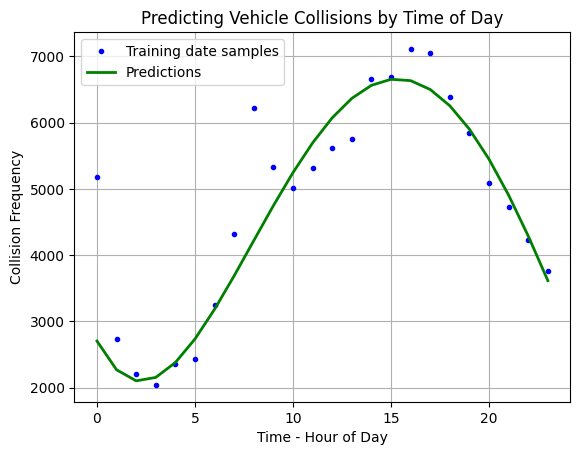

In [396]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
X_new = np.sort(X,axis = 0) # in order to plot the line of the model, we need to sort the the value of x-axis
X_new_ploy = poly.fit_transform(X_new) # compute the polynomial features
y_predict = model.predict(X_new_ploy) # make predictions using trained Linear Regression model

# plot the original dataset and the prediction results
fig,ax = plt.subplots()
ax.plot(X,Y,'b.', label = 'Training date samples')
ax.plot(X_new,y_predict,'g-',linewidth=2, label = 'Predictions')
ax.set_xlabel('Time - Hour of Day')
ax.set_ylabel('Collision Frequency')
ax.legend()
ax.grid(True)
plt.title('Predicting Vehicle Collisions by Time of Day')

In [397]:
# Evaluate accuracy of model
score = model.score(X_test, y_test)
print(f"Model R² score: {score:.3f}")

Model R² score: 0.063


### **Results Summary** ###

From the analysis of the data using cubic spline interpolation, I was able to reveal an effective method for gauging the frequency of collisions by time of day depending on the various contributing factors within the data. This process showed that computational methods such as cubic spline interpolation can be effectively used to gain a clearer and more complete understanding of the data, and to identify trends based on different variables within the data.

However, the predictive model left much to be desired. Based on the data, the model produced to predict the frequency of collisions by time of day only had an $R^{2}$ score of 0.063. This is very low, indicating that only 6.3% of variation in the dependent variable (collision frequency) was explained by the independent variable (time of day) within the model. Thus, it does not fit the data well.

### **Comparison** ###

My computational analysis of the data seems to align with existing research on the subject. Based on collision trends and averages from 2023, the National Safety Council (NSC) found that collisions tend to peak between 4 and 8 PM (NSC, n.d.). This was seen in my analysis of the data as well, with a peak of around 7 PM. More specific information based on collision causation factors comes from a 2008 report from the National Highway Traffic Safety Administration (NHTSA) to Congress, titled “National Motor Vehicle Crash Causation Survey”. The report reveals that, for collision cases where the primary contributing factor was attributed to an at-fault driver, 41% of these critical factors involved “recognition errors” such as distraction of inattention (NHTSA, 2008, p. 2). This is interesting because, from the dataset explored in this analysis, the vast majority of collisions seem to have been primarily caused by traffic errors and violations. This could be due to the difference in time between the report and this dataset (2008 vs 2024). However, a 2018 statistical summary on collision causes, also from the NHTSA, still cites 41% as the most frequent value attributed to this factor (NHTSA, 2018, p. 2). With this in mind, the discrepancy could also be due to the large number of collisions in this dataset that do not specify the primary contributing factor.

____
## 6. Conclusion ##
___

To begin, I believe a successful predictive model for collision frequency based on the time of day must also include information about the day of the year as well in order to be successful. I believe my data was limited by the amount of incomplete information on the contributing factors of the collisions, and my process was flawed in that I did not consider adding more variables to my model. Admittedly, this is a bit outside of my skillset.

Additionally, it is clear that a disproportionate amount of vehicle collisions in the US are caused by either inattention or distraction on the part of the at-fault party. With the large presence of awareness campaigns and legislation for factors such as phone use while driving, as well as driving under the influence of drugs or alcohol, it is clear that a key cause of collisions is being overlooked. More awareness should be promoted with regards to being present and attentive while driving. I also feel that educational programs for being attentive and avoiding distractions while driving would be beneficial.


____
## 7. References ##
___

Ballotpedia. (n.d.). Largest cities in the United States by population. https://ballotpedia.org/Largest_cities_in_the_United_States_by_population

City of New York. (2025, April 25). Motor vehicle collisions - crashes. NYC OpenData. https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

Kong, Q., Siauw T., & Bayen, A. (2020). Python programming and numerical methods: A guide for engineers and scientists. Elsevier. https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

NHTSA. (2018). Critical reasons for crashes investigated in the national motor vehicle crash causation survey. https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812506

NHTSA. (2008). National motor vehicle crash causation survey. https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/811059

NSC. (n.d.). Crashes by time of day and day of week. https://injuryfacts.nsc.org/motor-vehicle/overview/crashes-by-time-of-day-and-day-of-week/